# Simple Linear Classifier 

In [114]:

#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import tensorflow as tf

In [95]:

#import data
data = pd.read_csv("./data/titanic/train.csv")

## Pre-Overview

In [96]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Overview and Pre-processing

Para esse exemplo simples iremos utilizar somente as colunas: <br>
- <b>Features</b>: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked;
- <b>Label</b>: Survived.

In [98]:
X = data.drop(['PassengerId', 'Name','Ticket','Cabin','Fare'],axis=1) # Features and Label

In [99]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [100]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

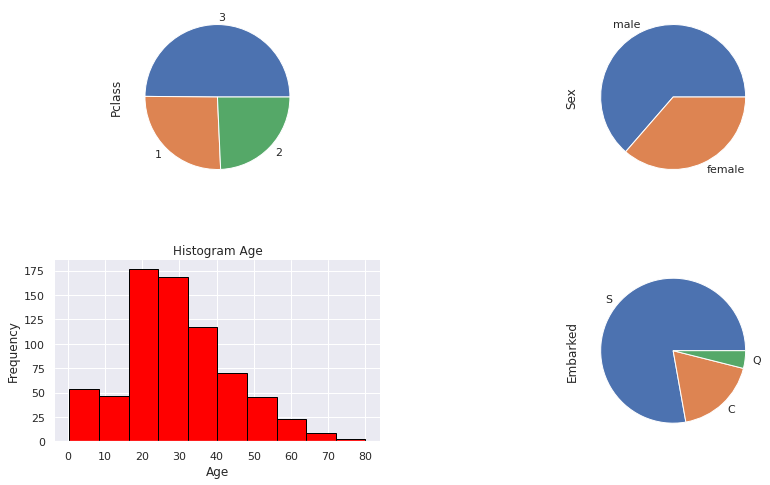

In [115]:

fig, axes = plt.subplots(2,2, figsize=(14,8))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

#Plot Pclass
X['Pclass'].value_counts().plot(kind='pie', ax=axes[0][0])

#Plot Sex
X['Sex'].value_counts().plot(kind='pie', ax=axes[0][1])

#Plot Age
X['Age'].plot(kind='hist', ax=axes[1][0], edgecolor='black', color='red')
axes[1][0].set_title('Histogram Age')
axes[1][0].set_xlabel('Age')
axes[1][0].spines['top'].set_visible(False)
axes[1][0].spines['left'].set_visible(False)
axes[1][0].spines['right'].set_visible(False)


# Plot Embarked
X['Embarked'].value_counts().plot(kind='pie', ax=axes[1][1])

plt.show()

Pontos observados:<br>
- A maior parte dos tripulantes pertence a 3º classe, são do sexo masculino, embarcaram em S e são jovens (idade entre 20 e 30 anos).<br><br>
As colunas "SibSp" e "Parch" referem-se ambas a familiares embarcados, logo, podem ser colocadas como uma única coluna.


In [102]:

X['Count_familiarEmbarked'] = X['SibSp'] + X['Parch']
X = X.drop(['SibSp','Parch'], axis=1)
X.head()

,Survived,Pclass,Sex,Age,Embarked,Count_familiarEmbarked
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0


- A coluna "Age" apresenta alguns valores NA, para simplificar iremos apenas deletalos.

In [103]:
X.dropna(inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Survived                712 non-null    int64  
 1   Pclass                  712 non-null    int64  
 2   Sex                     712 non-null    object 
 3   Age                     712 non-null    float64
 4   Embarked                712 non-null    object 
 5   Count_familiarEmbarked  712 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 38.9+ KB


In [104]:
y = X['Survived'] # Label
X = X.drop(['Survived'], axis=1) # Features

In [105]:
X.head()

,Pclass,Sex,Age,Embarked,Count_familiarEmbarked
0,3,male,22.0,S,1
1,1,female,38.0,C,1
2,3,female,26.0,S,0
3,1,female,35.0,S,1
4,3,male,35.0,S,0


In [106]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

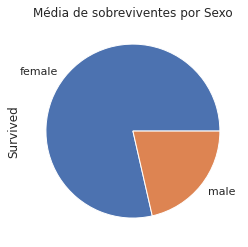

In [119]:

fig, axes = plt.subplots()

pd.concat([X, y], axis=1).groupby('Sex').Survived.mean().plot(kind='pie', normalize=True, ax=axes)
axes.set_title('Média de sobreviventes por Sexo')

plt.show()

- Pode-se observar que o sexo feminino apresenta maior média de sobreviventes.


In [ ]:
# 

## References

[1]https://colab.research.google.com/drive/15Cyy2H7nT40sGR7TBN5wBvgTd57mVKay#forceEdit=true&sandboxMode=true&scrollTo=LisxO81tgi1n<br>
[2]https://www.youtube.com/watch?v=tPYj3fFJGjk<br>
[3]https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression#CONTEXT<br>